In [236]:
import time
import numpy as np
import sklearn
import pandas as pd
import requests 
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Standardscaler

ImportError: cannot import name 'Standardscaler' from 'sklearn.preprocessing' (C:\Users\avoav\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [241]:
cars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_col  = 'index')
cars

,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium,price
index,,,,,,,,,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,קופרה,2021,0,0,0,0,0,0,0,...,1,5,2417,445.0,medium,0,0,0,1,176000
1,טויוטה קורולה GLI,טויוטה,2011,0,0,0,0,0,0,0,...,1,4,1262,454.5,medium,0,0,0,1,45000
2,קיה פיקנטו LX,קיה,2020,0,0,0,0,0,0,0,...,1,9,1235,359.5,mini,0,0,1,0,79900
3,הונדה סיוויק COMFORT,הונדה,2014,0,0,0,0,0,0,0,...,0,2,1424,430.0,medium,0,0,0,1,44900
4,פיאט 500 1.2 POP STAR,פיאט,2017,0,0,0,0,0,0,0,...,1,2,1353,357.1,mini,0,0,1,0,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,סקודה קודיאק AMBITION,סקודה,2017,0,0,0,0,0,0,0,...,0,5,2019,448.0,medium,0,0,0,1,132000
2998,סקודה פאביה AMBITION,סקודה,2016,0,0,0,0,0,0,0,...,0,4,1102,399.2,small,0,1,0,0,59000
2999,מאזדה 3,מאזדה,2020,0,0,0,0,0,0,0,...,1,11,2130,466.0,medium,0,0,0,1,130500


In [130]:
ElCarsIndex = cars[cars['engine_size'] == "חשמלי"].index
foul_cars = cars.drop(index = foulCarsIndex )
foul_cars['engine_size'] = foul_cars['engine_size'].astype(int)


In [131]:
foul_cars = foul_cars.groupby('size').agg({'engine_size' : "mean"})

foul_cars

,engine_size
size,
large,2467.195426
medium,1664.751363
mini,1245.497738
small,1348.035714


In [153]:
large = foul_cars.iloc[0,0]
med = foul_cars.iloc[1,0]
mini = foul_cars.iloc[2,0]
small = foul_cars.iloc[3,0]

ElCarsIndex = cars[cars['engine_size'] == "חשמלי"].index
ElCarsIndex  = np.array(ElCarsIndex)

for x in ElCarsIndex:
    if (cars.iloc[x, cars.columns.get_loc("size")] == "large"): 
        cars['engine_size'][x] = large 
    if (cars.iloc[x, cars.columns.get_loc("size")] == "medium"): 
        cars['engine_size'][x] = med
    if (cars.iloc[x, cars.columns.get_loc("size")] == "mini"): 
        cars['engine_size'][x] = mini
    if (cars.iloc[x, cars.columns.get_loc("size")] == "small"): 
        cars['engine_size'][x] = small

<ipython-input-153-18929421816c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['engine_size'][x] = med


In [156]:
cars['engine_size'] = cars['engine_size'].astype(int)

In [159]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 3001
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   version               3002 non-null   object 
 1   CompanyName           3002 non-null   object 
 2   year                  3002 non-null   int64  
 3   is_GAC                3002 non-null   int64  
 4   is_maserati           3002 non-null   int64  
 5   is_daihatsu           3002 non-null   int64  
 6   is_porsche            3002 non-null   int64  
 7   is_ds                 3002 non-null   int64  
 8   is_smart              3002 non-null   int64  
 9   is_seres              3002 non-null   int64  
 10  is_cadillac           3002 non-null   int64  
 11  is_דודג'              3002 non-null   int64  
 12  is_infinity           3002 non-null   int64  
 13  is_alfa-romeo         3002 non-null   int64  
 14  is_buick              3002 non-null   int64  
 15  is_sangiang          

In [161]:
cars.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_label  = 'index')

In [162]:
cars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\cars_data.csv' , index_col  = 'index')
cars

,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium,price
index,,,,,,,,,,,,,,,,,,,,,
0,קופרה פורמנטור SILVER STORM,קופרה,2021,0,0,0,0,0,0,0,...,1,5,2417,445.0,medium,0,0,0,1,176000
1,טויוטה קורולה GLI,טויוטה,2011,0,0,0,0,0,0,0,...,1,4,1262,454.5,medium,0,0,0,1,45000
2,קיה פיקנטו LX,קיה,2020,0,0,0,0,0,0,0,...,1,9,1235,359.5,mini,0,0,1,0,79900
3,הונדה סיוויק COMFORT,הונדה,2014,0,0,0,0,0,0,0,...,0,2,1424,430.0,medium,0,0,0,1,44900
4,פיאט 500 1.2 POP STAR,פיאט,2017,0,0,0,0,0,0,0,...,1,2,1353,357.1,mini,0,0,1,0,42900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,סקודה קודיאק AMBITION,סקודה,2017,0,0,0,0,0,0,0,...,0,5,2019,448.0,medium,0,0,0,1,132000
2998,סקודה פאביה AMBITION,סקודה,2016,0,0,0,0,0,0,0,...,0,4,1102,399.2,small,0,1,0,0,59000
2999,מאזדה 3,מאזדה,2020,0,0,0,0,0,0,0,...,1,11,2130,466.0,medium,0,0,0,1,130500


In [66]:
#def split_train_test (data , test_ratio)
    #p.55 book...
    

## split to train and test:

In [242]:
prices = cars['price']
Dcars = cars.copy().drop(columns = "price")

dataTrain , DataFinalTest , targetTrain  , TargetFinalTest = sklearn.model_selection.train_test_split(Dcars, prices , test_size=0.1 , random_state = 42)



In [243]:
dataTrain.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TrainSet_data.csv' , index_label='index' )
targetTrain.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TrainSet-target_data.csv' , index_label='index' )

In [244]:
DataFinalTest.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TestSet_data.csv' , index_label='index' )
TargetFinalTest.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TestSet-target_data.csv' , index_label='index' )

In [246]:
DataFinalTest = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TestSet_data.csv' , index_col  = 'index')

DataFinalTest

,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,is_company,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium
index,,,,,,,,,,,,,,,,,,,,,
2786,יונדאי איוניק HYBRID PREMIUM,יונדאי,2019,0,0,0,0,0,0,0,...,0,0,2,1811,447.0,medium,0,0,0,1
2148,סקודה ראפיד AMBITION,סקודה,2017,0,0,0,0,0,0,0,...,1,0,6,1353,448.3,medium,0,0,0,1
1410,טויוטה קורולה SUN,טויוטה,2019,0,0,0,0,0,0,0,...,0,0,3,1811,463.0,medium,0,0,0,1
251,טויוטה יאריס HYBRID ECO,טויוטה,2018,0,0,0,0,0,0,0,...,0,0,8,1353,394.5,small,0,1,0,0
2506,יונדאי סנטה פה LUXURY,יונדאי,2011,0,0,0,0,0,0,0,...,0,1,11,1508,466.0,medium,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,סקודה אוקטביה AMBITION,סקודה,2019,0,0,0,0,0,0,0,...,0,0,1,1811,467.0,medium,0,0,0,1
2637,פיג'ו 3008 PREMIUM,פיג'ו,2018,0,0,0,0,0,0,0,...,0,0,4,2019,444.7,medium,0,0,0,1
1607,סקודה סופרב STYLE,סקודה,2018,0,0,0,0,0,0,0,...,0,1,8,2019,486.1,large,1,0,0,0


In [248]:
TargetFinalTest

index
2786     98900
2148     56500
1410    107000
251      81000
2506     77900
         ...  
787      95900
2637    125512
1607    129000
402      48000
433      58900
Name: price, Length: 301, dtype: int64

In [261]:
dataTrain =pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TrainSet_data.csv' , index_col  = 'index')
dataTrain

,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,is_company,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium
index,,,,,,,,,,,,,,,,,,,,,
2902,אאודי TT COUPE DESIGN,אאודי,2019,0,0,0,0,0,0,0,...,0,1,7,3366,417.7,small,0,1,0,0
73,קיה סורנטו URBAN,קיה,2019,0,0,0,0,0,0,0,...,0,1,11,2019,480.0,large,1,0,0,0
1537,יונדאי איוניק HYBRID PREMIUM,יונדאי,2018,0,0,0,0,0,0,0,...,0,0,8,1604,447.0,medium,0,0,0,1
2638,פולקסווגן גולף TRENDLINE,פולקסווגן,2017,0,0,0,0,0,0,0,...,0,0,3,1604,425.5,medium,0,0,0,1
621,סקודה ראפיד STYLE,סקודה,2018,0,0,0,0,0,0,0,...,0,1,6,1353,424.7,medium,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,קיה סורנטו URBAN,קיה,2020,0,0,0,0,0,0,0,...,0,0,6,3366,480.0,large,1,0,0,0
1095,אאודי Q5 LUXURY,אאודי,2011,0,0,0,0,0,0,0,...,0,1,1,1726,462.9,medium,0,0,0,1
1130,רנו מגאן LIFE,רנו,2018,0,0,0,0,0,0,0,...,0,0,9,1604,462.6,medium,0,0,0,1


In [249]:
targetTrain

index
2902    217000
73      169900
1537     94900
2638     76000
621      86500
         ...  
1638    192900
1095     83500
1130     78900
1294    137990
860     127000
Name: price, Length: 2701, dtype: int64

In [ ]:
#We decided that each of us would work with a model on an independent train and test
#so we would get a more accurate indication of the quality of the model

# scaling the cols

In [262]:
scaledCars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TrainSet_data.csv' , index_col  = 'index')
min_max_scaler = MinMaxScaler()
scaledCars[["year", "annual_licensing_fee", "engine_size",  "next_test_in" , "car_length" , "current_mileage"]] = min_max_scaler.fit_transform(scaledCars[["year", "annual_licensing_fee", "engine_size",  "next_test_in" , "car_length" ,"current_mileage"]])

In [263]:
scaledCars = scaledCars.drop(columns = ["version" , "CompanyName", "size" , "color" , "original_onership" , "engine_type" , "engine"  ] )


In [264]:
scaledCars

,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,is_cadillac,is_דודג',...,is_leasing,is_company,is_private,next_test_in,annual_licensing_fee,car_length,large,small,mini,medium
index,,,,,,,,,,,,,,,,,,,,,
2902,0.857143,0,0,0,0,0,0,0,0,0,...,0,0,1,0.500000,0.645547,0.562429,0,1,0,0
73,0.857143,0,0,0,0,0,0,0,0,0,...,0,0,1,0.833333,0.295767,0.798861,1,0,0,0
1537,0.809524,0,0,0,0,0,0,0,0,0,...,1,0,0,0.583333,0.188003,0.673624,0,0,0,1
2638,0.761905,0,0,0,0,0,0,0,0,0,...,1,0,0,0.166667,0.188003,0.592030,0,0,0,1
621,0.809524,0,0,0,0,0,0,0,0,0,...,0,0,1,0.416667,0.122825,0.588994,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.904762,0,0,0,0,0,0,0,0,0,...,1,0,0,0.416667,0.645547,0.798861,1,0,0,0
1095,0.476190,0,0,0,0,0,0,0,0,0,...,0,0,1,0.000000,0.219683,0.733966,0,0,0,1
1130,0.809524,0,0,0,0,0,0,0,0,0,...,1,0,0,0.666667,0.188003,0.732827,0,0,0,1


In [265]:
scaledCars.to_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\ScaledTrainSet_data.csv' , index_label='index' )

In [266]:
scaledCars = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\ScaledTrainSet_data.csv' , index_col='index' )

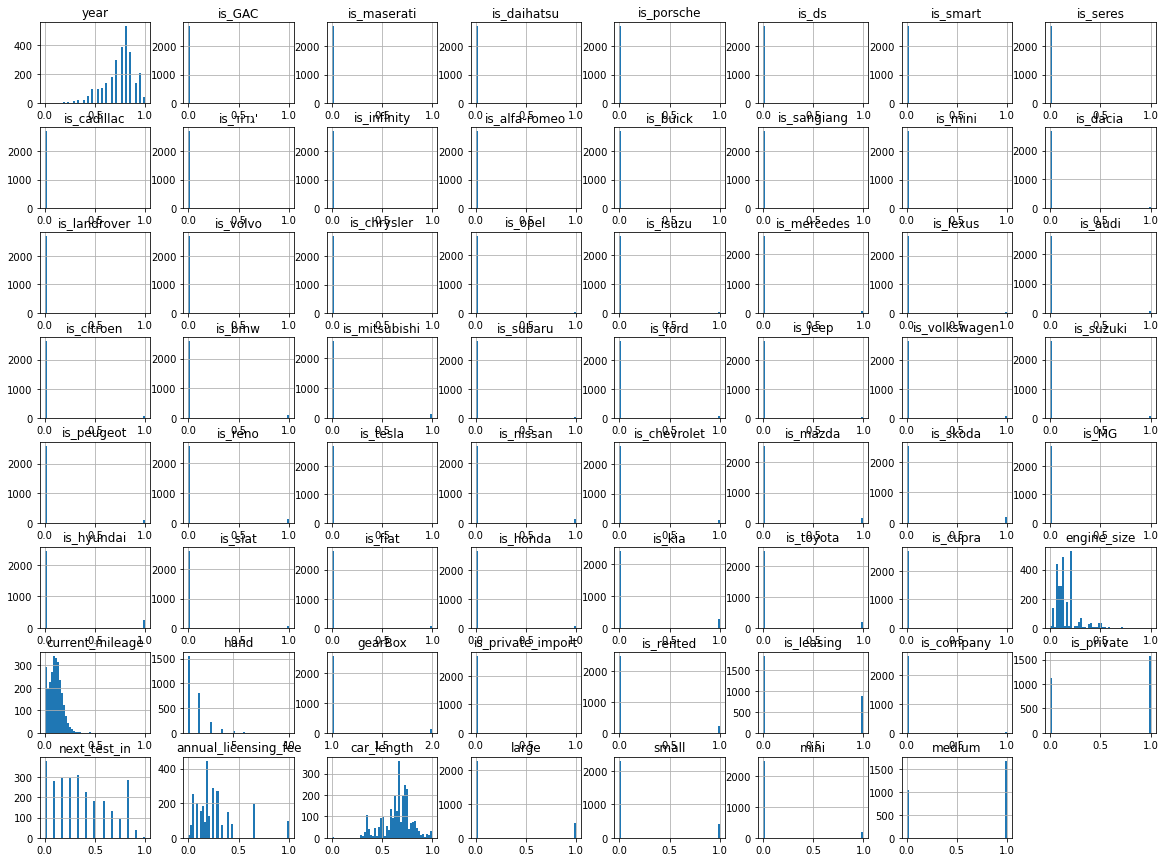

In [267]:
scaledCars.hist(bins = 50 , figsize = ( 20, 15))
plt.show()

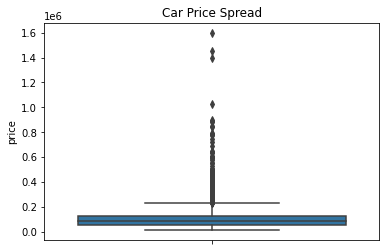

count    3.002000e+03
mean     1.114245e+05
std      1.067789e+05
min      1.000000e+04
25%      5.490000e+04
50%      8.790000e+04
75%      1.250000e+05
max      1.600000e+06
Name: price, dtype: float64


In [196]:
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)
plt.show()
print(cars.price.describe())

In [ ]:
def heatmap(x,y,dataframe):
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()
    
heatmap (10 , 10 , cars)

# looking for correlations:


In [275]:
corr_matrix = cars.corr()

In [276]:
corr_matrix['price'].sort_values(ascending=False)

price                   1.000000
annual_licensing_fee    0.830044
engine_size             0.464133
year                    0.452767
is_mercedes             0.419014
                          ...   
is_rented              -0.134850
mini                   -0.137759
hand                   -0.156302
is_leasing             -0.192209
current_mileage        -0.415577
Name: price, Length: 64, dtype: float64

In [ ]:
#הקורלציה הכי גבוהה היא ביחס לאגרת הרישוי השנתית , לאחר בדיקה הבנו שהיא סוג של נגזרת של המחיר אבל גם קורלציה של 0.46 היא יחסית גבוהה 
של גודל המנוע והשנהת כנל קילומטראז' 


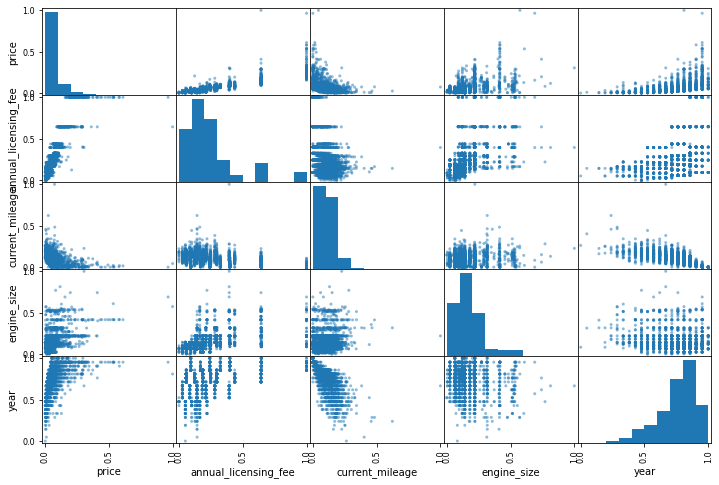

In [203]:
#check for correlation between attributes:

attributes = ["price" , "annual_licensing_fee", "current_mileage", "engine_size" , "year" ]
attributes2 = [ "price" , "large" , "small" , "mini" , "medium"]
scatter_matrix(demo_cars[attributes] , figsize = (12,8))
plt.show()

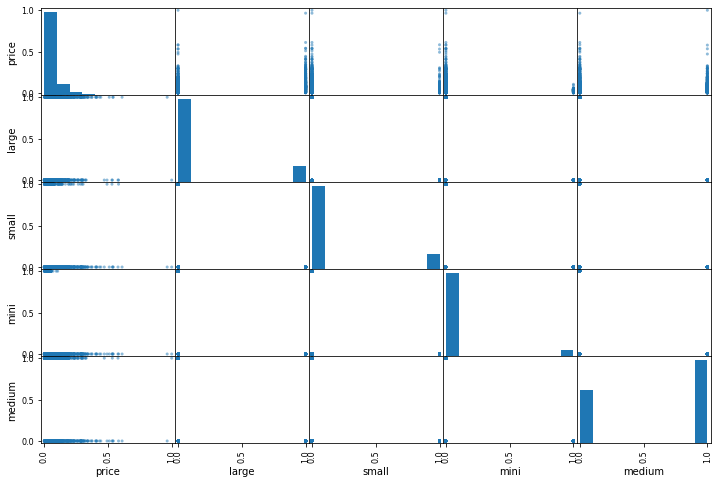

In [204]:
scatter_matrix(demo_cars[attributes2] , figsize = (12,8))
plt.show()

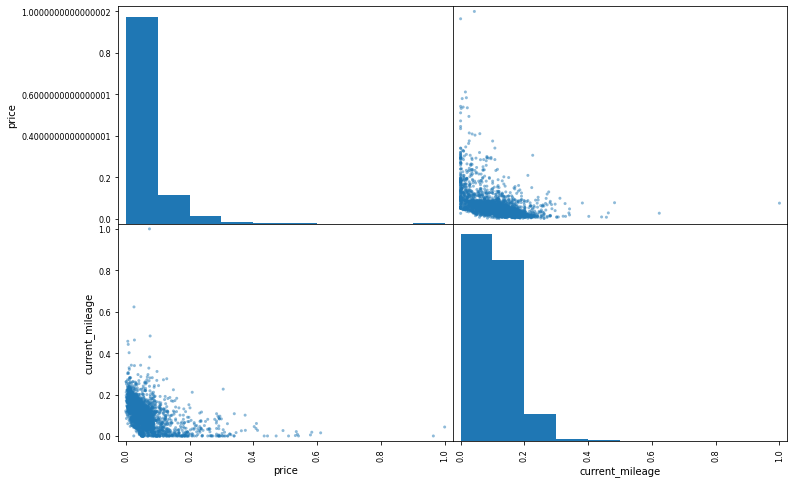

In [213]:
attribute = ["price" ,"current_mileage"]
scatter_matrix(demo_cars[attribute] , figsize = (12,8) )
plt.show()


# #exploring the Data

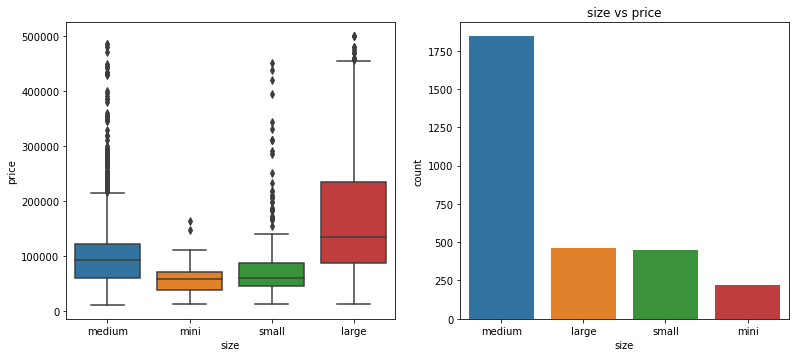

In [282]:
plt.figure(figsize=(20, 12))

plt.subplot(2 , 3 , 1)
sns.boxplot(x = 'size', y = 'price', data = cars)

plt.subplot(2,3,2)
plt.title('size vs price')
order = cars['size'].value_counts(ascending=False).index
sns.countplot(x='size', data=cars, order=order)

plt.show()

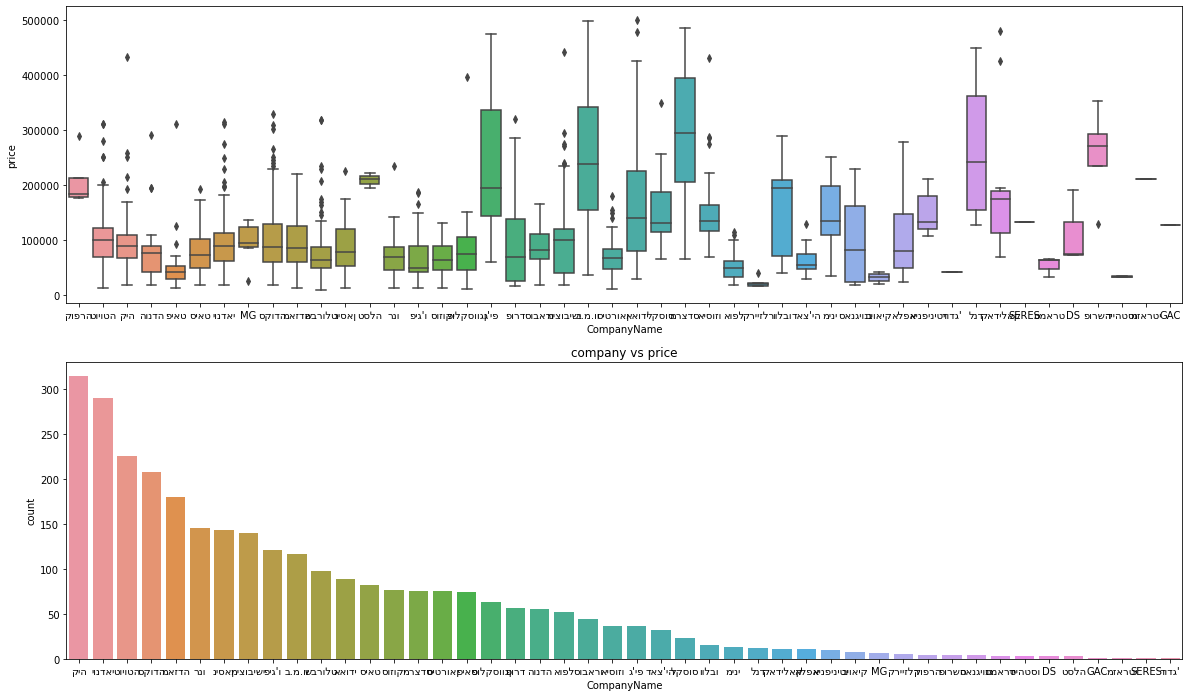

In [281]:
plt.figure(figsize=(20, 12))

plt.subplot(2 , 1, 1)
sns.boxplot(x = 'CompanyName', y = 'price', data = cars)

plt.subplot(2,1,2)
plt.title('company vs price')
order = cars['CompanyName'].value_counts(ascending=False).index
sns.countplot(x='CompanyName', data=cars, order=order)

plt.show()

In [269]:
cars.sort_values(by = "price" , ascending=False).head(10)
#ניתן לראות שהרכבים היקרים ביותר קיצוניים מאוד במחיר ולכן נמחק את התוצאות הללו שלא מייצגות בכלל את הטבלה.

,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium,price
index,,,,,,,,,,,,,,,,,,,,,
1777,מרצדס AMG G63 AMG LINE,מרצדס,2021,0,0,0,0,0,0,0,...,1,11,4731,488.5,large,1,0,0,0,1600000
2060,פורשה 911 TURBO S,פורשה,2018,0,0,0,1,0,0,0,...,1,6,3357,450.7,medium,0,0,0,1,1450000
1890,ב.מ.וו סדרה 8 M850I XDRIVE ELEGANT,ב.מ.וו,2021,0,0,0,0,0,0,0,...,0,3,4731,508.2,large,1,0,0,0,1399000
164,מרצדס S קלאס S560 4M MAYBACH ULTIMATE,מרצדס,2019,0,0,0,0,0,0,0,...,1,7,4731,525.5,large,1,0,0,0,1030000
1848,ב.מ.וו X7 XDRIVE 40D PURE EXCELLE,ב.מ.וו,2021,0,0,0,0,0,0,0,...,1,6,4731,369.8,mini,0,0,1,0,894719
1988,מרצדס S קלאס S560 E LONG ESSENCE,מרצדס,2021,0,0,0,0,0,0,0,...,1,2,4731,525.5,large,1,0,0,0,890000
851,מרצדס AMG GT43 4MATIC,מרצדס,2021,0,0,0,0,0,0,0,...,1,2,4731,493.6,large,1,0,0,0,879000
2512,מרצדס AMG GT43 4MATIC EDITION,מרצדס,2020,0,0,0,0,0,0,0,...,1,4,4731,397.3,small,0,1,0,0,850000
1850,ב.מ.וו סדרה 8 840I M-SPORT,ב.מ.וו,2021,0,0,0,0,0,0,0,...,1,7,4731,467.0,medium,0,0,0,1,844000


In [278]:
#Throwing extreme examples:
to_injection =int(cars.price.count() / 100)

#array of Index to drop:
ind = cars.sort_values(by = "price" , ascending=False).price.head(to_injection).index

for x in ind:
    cars.drop(index=x, inplace=True)
    

In [279]:
cars.sort_values(by = "price" , ascending=False).head(10)

,version,CompanyName,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,...,is_private,next_test_in,annual_licensing_fee,car_length,size,large,small,mini,medium,price
index,,,,,,,,,,,,,,,,,,,,,
2901,אאודי Q8 LUXURY,אאודי,2019,0,0,0,0,0,0,0,...,1,1,4731,498.6,large,1,0,0,0,500000
2315,ב.מ.וו סדרה 5 530E M-SUPERIOR,ב.מ.וו,2021,0,0,0,0,0,0,0,...,1,3,4731,496.3,large,1,0,0,0,499000
1234,ב.מ.וו X5 SDRIVE 40I SUPERIOR,ב.מ.וו,2021,0,0,0,0,0,0,0,...,1,6,4731,492.2,large,1,0,0,0,499000
2302,מרצדס GLC 300E 4MATIC COUPE AMG,מרצדס,2021,0,0,0,0,0,0,0,...,1,2,4731,465.8,medium,0,0,0,1,485000
2005,מרצדס EQC 400 4MATIC AMG LINE,מרצדס,2021,0,0,0,0,0,0,0,...,1,2,4731,467.9,medium,0,0,0,1,485000
1395,מרצדס GLE 350 AMG LINE,מרצדס,2021,0,0,0,0,0,0,0,...,1,3,4731,492.4,large,1,0,0,0,480000
1291,קאדילאק אסקילייד P-LUXURY,קאדילאק,2019,0,0,0,0,0,0,0,...,1,2,4731,517.9,large,1,0,0,0,480000
2795,אאודי RSQ3 RS,אאודי,2021,0,0,0,0,0,0,0,...,1,7,4731,450.6,medium,0,0,0,1,479000
1423,ג'יפ רנגלר ETQ SPORT S SPORT,ג'יפ,2021,0,0,0,0,0,0,0,...,1,6,4731,488.2,large,1,0,0,0,475000


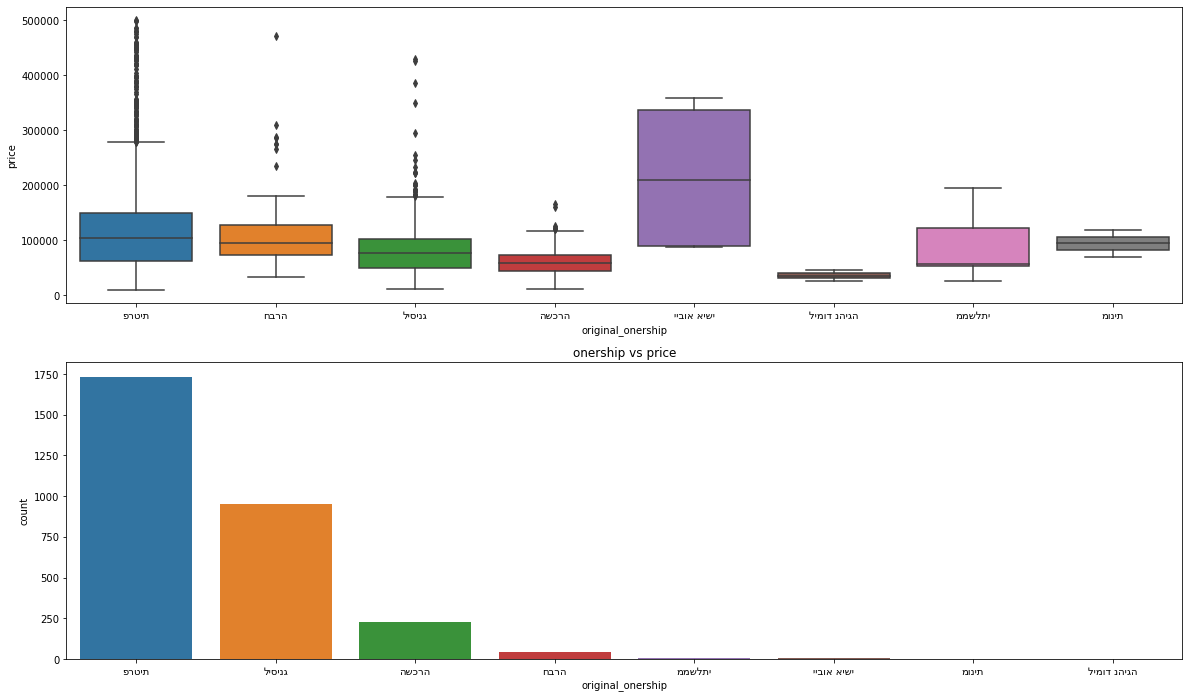

In [280]:
plt.figure(figsize=(20, 12))

plt.subplot(2 , 1, 1)
sns.boxplot(x = 'original_onership', y = 'price', data = cars)

plt.subplot(2,1,2)
plt.title('onership vs price')
order = cars['original_onership'].value_counts(ascending=False).index
sns.countplot(x='original_onership', data=cars, order=order)

plt.show()